In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Đọc dữ liệu và trích xuất đặc trưng thời gian
df = pd.read_csv("Data/powerconsumption.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])

df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['Weekday'] = df['Datetime'].dt.weekday

# Xử lý dữ liệu thiếu
df = df.dropna()

# Tách đặc trưng và mục tiêu
features = ['Temperature', 'Humidity', 'WindSpeed', 
            'GeneralDiffuseFlows', 'DiffuseFlows', 
            'Hour', 'Day', 'Month', 'Weekday']
target = 'PowerConsumption_Zone1'

X = df[features]
y = df[target]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


In [2]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("📊 Linear Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R²:", r2_score(y_test, y_pred_lr))


📊 Linear Regression:
RMSE: 4213.349984653966
R²: 0.6484298680142493


In [3]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("🌲 Random Forest:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))


🌲 Random Forest:
RMSE: 919.3997845410937
R²: 0.9832596051960508


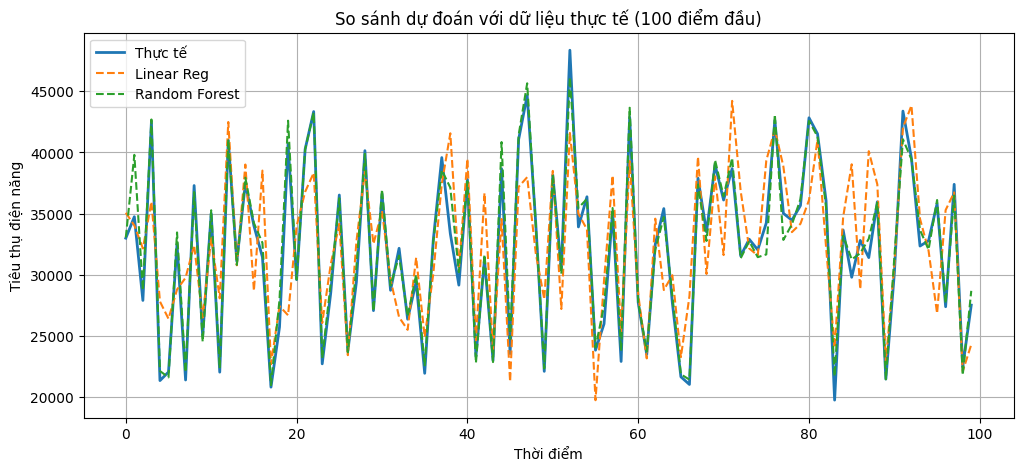

In [4]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='Thực tế', linewidth=2)
plt.plot(y_pred_lr[:100], label='Linear Reg', linestyle='--')
plt.plot(y_pred_rf[:100], label='Random Forest', linestyle='--')
plt.title('So sánh dự đoán với dữ liệu thực tế (100 điểm đầu)')
plt.xlabel('Thời điểm')
plt.ylabel('Tiêu thụ điện năng')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
joblib.dump(lr_model, "linear_regression_model.pkl")
joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Đã lưu mô hình và scaler.")


✅ Đã lưu mô hình và scaler.


In [6]:
# Ví dụ dữ liệu mới
new_data = pd.DataFrame([{
    'Temperature': 25,
    'Humidity': 60,
    'WindSpeed': 3.5,
    'GeneralDiffuseFlows': 400,
    'DiffuseFlows': 150,
    'Hour': 14,
    'Day': 10,
    'Month': 5,
    'Weekday': 2
}])

# Load scaler và model
scaler = joblib.load("scaler.pkl")
rf_model = joblib.load("random_forest_model.pkl")

# Chuẩn hóa và dự đoán
new_data_scaled = scaler.transform(new_data)
prediction = rf_model.predict(new_data_scaled)

print("🔮 Dự đoán tiêu thụ điện năng từ dữ liệu mới:", prediction[0])


🔮 Dự đoán tiêu thụ điện năng từ dữ liệu mới: 34540.219114299995


In [7]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("✅ Kết quả GridSearch:")
print("Best parameters:", grid_search.best_params_)

# Đánh giá mô hình tốt nhất
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("🌟 RMSE tốt nhất:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("🌟 R² tốt nhất:", r2_score(y_test, y_pred_best))


Fitting 3 folds for each of 18 candidates, totalling 54 fits


KeyboardInterrupt: 